In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import norm
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from  sklearn.preprocessing import RobustScaler, StandardScaler, Normalizer, QuantileTransformer, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [150]:
train=pd.read_csv("../Forest Cover Type Prediction/train.csv")
test=pd.read_csv("../Forest Cover Type Prediction/train.csv")
submission=pd.read_csv("../Forest Cover Type Prediction/sampleSubmission.csv")

In [151]:
train.shape

(15120, 56)

In [152]:
test.shape

(15120, 56)

In [153]:
submission.shape

(565892, 2)

In [113]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


총 15119 columns

In [114]:
pd.set_option('display.max_columns',None)
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [115]:
Ytrain=train['Cover_Type']
train=train[list(test)]

In [116]:
train=train.drop(columns=['Soil_Type7','Soil_Type15'])
test=test.drop(columns=['Soil_Type7','Soil_Type15'])

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

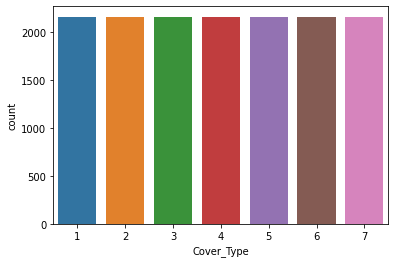

In [117]:
sns.countplot(Ytrain)
Ytrain.value_counts()

In [118]:
train['Distance_To_Hydrology']=np.sqrt((train['Horizontal_Distance_To_Hydrology'] **2)  + (train['Vertical_Distance_To_Hydrology'] **2))
test['Distance_To_Hydrology']=np.sqrt((test['Horizontal_Distance_To_Hydrology'] **2)  + (test['Vertical_Distance_To_Hydrology'] **2))

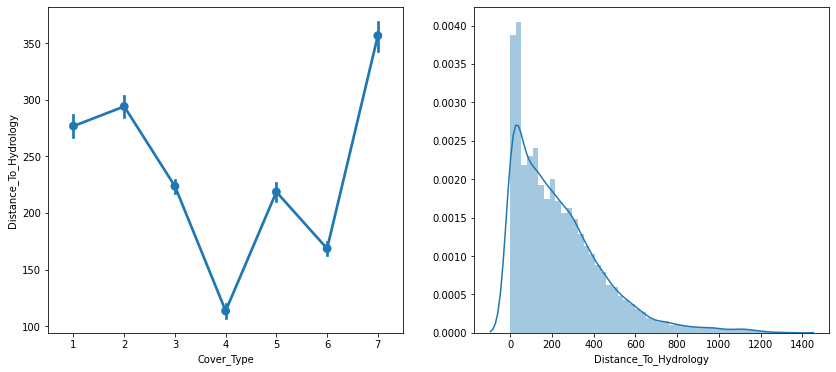

In [119]:
figure, (ax1,  ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)

sns.pointplot(data=train, x=Ytrain, y='Distance_To_Hydrology', ax=ax1)
sns.distplot(train['Distance_To_Hydrology'], ax=ax2)

In [120]:
print(f"Num_Kind of plants living in water? : {Ytrain.loc[train.loc[train['Distance_To_Hydrology']==0].index].nunique()}")

Num_Kind of plants living in water? : 7


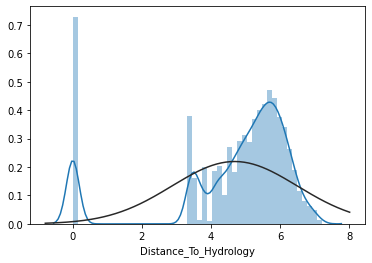

In [121]:
sns.distplot(np.log(train['Distance_To_Hydrology']+1), fit=norm)
train['Distance_To_Hydrology']=np.log(train['Distance_To_Hydrology']+1)
test['Distance_To_Hydrology']=np.log(test['Distance_To_Hydrology']+1)


train.loc[train['Distance_To_Hydrology']==0,'Distance_To_Hydrology']=np.nan
test.loc[test['Distance_To_Hydrology']==0,'Distance_To_Hydrology']=np.nan

In [122]:
qut=QuantileTransformer(output_distribution='normal')
pipeline=make_pipeline(qut, PCA(n_components=1))

In [123]:
train.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Distance_To_Hydrology
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,-0.068739,-0.339861,0.158484,0.384219,-0.158451,-0.058451,0.045545,-0.045757,0.118214,-0.041713,-0.046017,-0.013159,-0.014219,0.032292,0.063372,-0.129930,0.015145,-0.016034,-0.003794,-0.002940,-0.070252,-0.029707,-0.069537,0.014734,0.035739,-0.017422,0.034019,0.005675,0.031176,0.024141,-0.005104,-0.231780,-0.157515,0.025826,0.068048,0.066887,0.022520,0.057480,0.009110,0.016040,0.086932,0.083376,0.122475,0.108363,0.068940
Elevation,0.185496,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563,0.330417,0.261729,0.354025,-0.783651,-0.218818,-0.147947,-0.307523,-0.125342,-0.141478,-0.187354,0.002934,-0.010571,-0.357816,-0.037906,0.017432,0.039304,-0.140619,-0.066252,-0.200663,-0.035173,0.029808,0.008548,0.032509,0.146236,0.159872,0.097647,0.010586,0.020669,0.040019,-0.001077,0.165304,0.048204,0.093191,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090,0.301757
Aspect,0.017702,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,-0.131262,0.028238,0.032578,0.075228,-0.024538,-0.020970,-0.069120,0.018019,0.000343,-0.006066,0.001723,-0.019391,0.111959,-0.034549,-0.044142,0.024312,0.001181,0.027121,0.029870,-0.042140,0.007570,-0.023330,0.018815,0.022301,0.041880,0.005480,-0.002340,-0.009775,0.018986,0.026330,-0.063428,-0.086897,0.008160,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015,0.014341
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527,-0.152820,-0.065923,-0.113033,0.286985,0.099355,-0.081498,0.265541,0.087841,0.074720,-0.047868,-0.012989,-0.022220,0.255804,-0.109798,-0.115088,0.119863,-0.054085,-0.064321,-0.124375,-0.069326,-0.047742,-0.068508,-0.033935,-0.076393,-0.184528,0.017982,0.011062,-0.030700,0.012295,0.036082,-0.083108,0.118725,-0.076851,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722,-0.033967
Horizontal_Distance_To_Hydrology,0.099637,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,-0.009402,0.087484,0.200532,-0.239303,-0.084766,0.024234,-0.089578,-0.059398,-0.025247,0.021203,0.002819,-0.005523,-0.112852,0.026150,0.034306,0.026595,-0.111878,-0.084804,-0.159717,-0.018282,-0.033946,-0.062873,-0.025207,-0.007840,-0.087963,0.046915,-0.004615,0.027879,0.064616,0.019663,0.033854,-0.032540,0.060886,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515,0.878091
Vertical_Distance_To_Hydrology,0.055348,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,-0.117835,0.017108,0.069884,0.027321,-0.034309,0.005436,0.070414,-0.016543,0.018550,0.094701,-0.007049,-0.014610,0.018305,-0.029364,-0.033237,0.085309,-0.087445,-0.070201,-0.155574,-0.039745,-0.040898,-0.065710,-0.022197,-0.064122,-0.144317,0.017148,-0.011697,-0.016315,0.047304,0.046287,-0.056267,-0.000083,0.006247,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647,0.619485
Horizontal_Distance_To_Roadways,-0.033028,0.

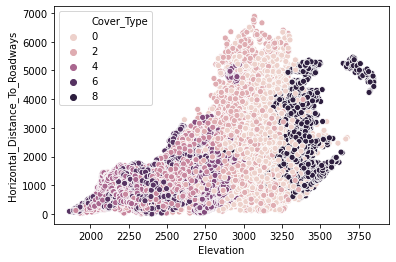

In [124]:
sns.scatterplot(data=train, x='Elevation', y='Horizontal_Distance_To_Roadways', hue=Ytrain)

In [125]:
train['Elevation_Roadways']=pipeline.fit_transform(train[['Elevation','Horizontal_Distance_To_Roadways']])
test['Elevation_Roadways']=pipeline.transform(test[['Elevation','Horizontal_Distance_To_Roadways']])

In [126]:
alpha=train[['Hillshade_9am','Hillshade_3pm']]
alpha2=test[['Hillshade_9am','Hillshade_3pm']]

In [127]:
train['Hillshade9am_Hillshade_3pm']=pipeline.fit_transform(alpha)
test['Hillshade9am_Hillshade_3pm']=pipeline.transform(alpha2)

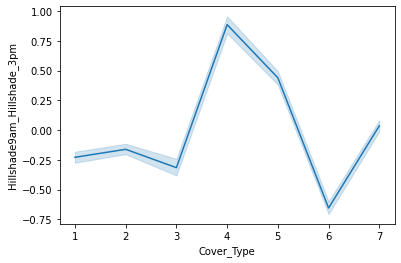

In [128]:
sns.lineplot(data=train, x=Ytrain, y='Hillshade9am_Hillshade_3pm')

In [129]:
alpha=train[['Aspect','Hillshade9am_Hillshade_3pm']]
alpha2=test[['Aspect','Hillshade9am_Hillshade_3pm']]

In [130]:
train['Aspect_Hillshade']=pipeline.fit_transform(alpha)
test['Aspect_Hillshade']=pipeline.transform(alpha2)

In [131]:
alpha=train[['Slope','Hillshade_Noon']]
alpha2=test[['Slope','Hillshade_Noon']]

In [132]:
train['Slope_Hillshade']=pipeline.fit_transform(alpha)
test['Slope_Hillshade']=pipeline.transform(alpha2)

In [133]:
Xtrain=train
Xtest=test

In [134]:
Xtest.shape

(15120, 59)

In [135]:
rf=RandomForestClassifier(n_estimators=5000, random_state=18, n_jobs=-1)
rf.fit(Xtrain.fillna(-999), Ytrain)
feature_importance_df=pd.DataFrame(data=None,  columns=['feature','importances'])
feature_importance_df['importances']=rf.feature_importances_
feature_importance_df['feature']=Xtrain.columns

feature_importance_df=feature_importance_df.sort_values(by='importances', ascending=False)
feature_importance_df.tail()

,feature,importances
22,Soil_Type9,4.403217e-05
40,Soil_Type28,3.652640e-05
48,Soil_Type36,3.094304e-05
37,Soil_Type25,5.692265e-06
21,Soil_Type8,4.088967e-07


In [136]:
feature_names=feature_importance_df.head(56)['feature']
Xtrain=train[feature_names]
Xtest=test[feature_names]
print(Xtrain.shape, Ytrain.shape, Xtest.shape)

(15120, 56) (15120,) (15120, 56)


In [137]:
params={'n_estimators': 1222, 'learning_rate': 0.07307234151834806, 'num_leaves': 96, 'colsample_bytree': 0.8972376156262298, 
        'subsample': 0.9312856106293543, 'min_child_samples': 1}

lightgbm=LGBMClassifier(random_state=18, subsample_freq=1, silent=False, **params)

In [138]:
submission.columns

Index(['Id', 'Cover_Type'], dtype='object')

In [139]:
submission.shape

(565892, 2)

In [145]:
lightgbm.fit(Xtrain, Ytrain)
predictions=lightgbm.predict(Xtest)

/Users/leehyoungwook/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [146]:
predictions.shape
Id=test['Id']

In [148]:
submission=pd.DataFrame({'Id': Id,'Cover_Type':predictions})
submission.to_csv('submision.csv',index=False)